**1. Context TechNova Solutions**, a mid-sized IT services company with around 1,200 employees, has been facing a high attrition rate compared to industry standards. Despite offering competitive salaries and benefits, the organization is struggling to retain talent, especially in technical and client-facing roles.
This has resulted in increased recruitment costs, disrupted project timelines, and declining morale among employees. A data-driven approach is needed to predict which employees are at risk of leaving and to assist HR in making proactive retention decisions.


**2. Problem Statement** The HR department currently lacks a systematic way to identify employees at risk of leaving. As a result, interventions are reactive and often come too late. The objective is to build a predictive model that can accurately classify employees as likely to stay or leave based on historical data. This will help HR focus on high-risk, high-value employees and plan retention strategies effectively.


**3. Objective**
1. Analyze and identify key factors influencing employee attrition.  
2. Build a machine learning model to predict employee churn.  
3. Generate actionable HR insights to enhance employee satisfaction and retention.



**4. Data Understanding**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('employee_churn_dataset.csv')

# Display first few rows
df.head()


,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,...,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Work-Life Balance,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
0,E00001,50,Male,Bachelor's,Married,5,Analyst,Marketing,93422,Remote,...,35,0,16,0.03,Poor,155,14,15,7.9,0
1,E00002,36,Male,Bachelor's,Married,4,Manager,Sales,44589,On-site,...,1,0,12,0.39,Average,162,2,8,5.2,0
2,E00003,29,Male,Bachelor's,Married,3,Sales,IT,56768,Hybrid,...,41,0,2,0.62,Poor,243,6,21,6.3,0
3,E00004,42,Male,Bachelor's,Single,12,Analyst,Sales,79009,On-site,...,33,0,8,0.73,Good,291,11,25,7.4,0
4,E00005,40,Other,Bachelor's,Married,1,Sales,HR,81982,On-site,...,30,0,13,0.52,Average,272,3,1,4.1,0


In [ ]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()


# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Marital Status                10000 non-null  object 
 5   Tenure                        10000 non-null  int64  
 6   Job Role                      10000 non-null  object 
 7   Department                    10000 non-null  object 
 8   Salary                        10000 non-null  int64  
 9   Work Location                 10000 non-null  object 
 10  Performance Rating            10000 non-null  int64  
 11  Projects Completed            10000 non-null  int64  
 12  Training Hours                10000 non-null  int64  
 13  Pr

,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000


**Observations:**
- Dataset contains demographic, job, and performance-related attributes.
- The target variable appears to be `Churn` (1 = Left, 0 = Stayed).
- Missing values and categorical data types need preprocessing before modeling.


**5. Exploratory Data Analysis (EDA)**

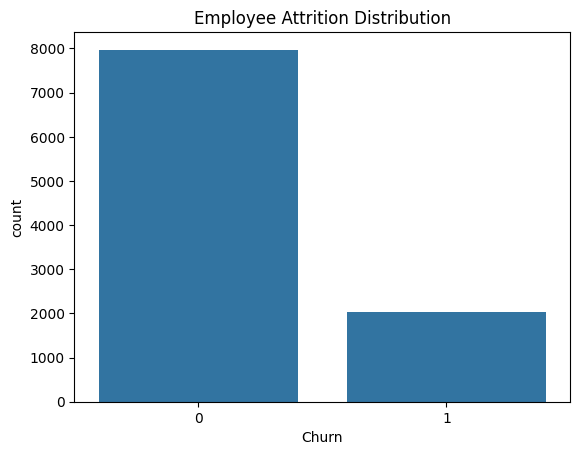

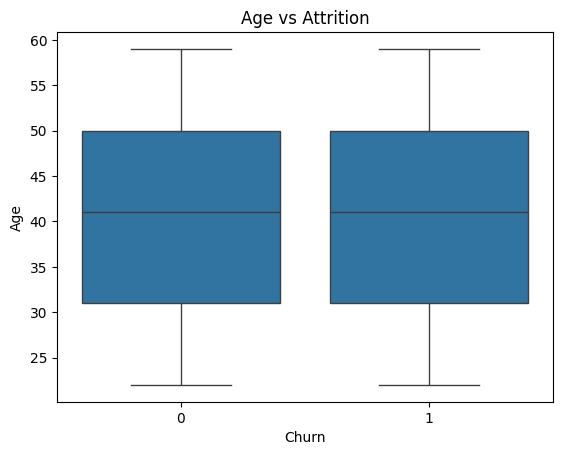

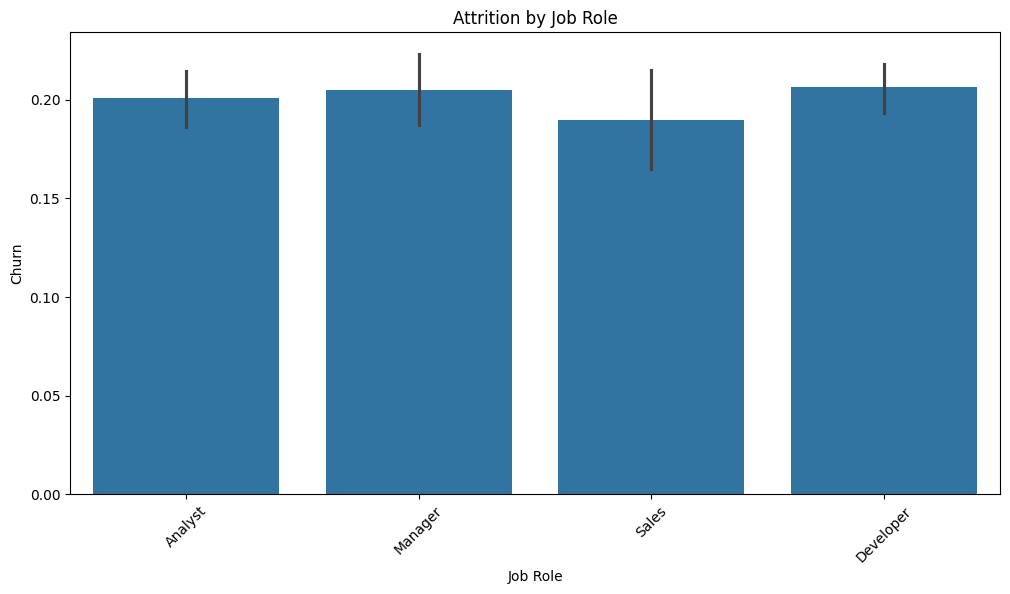

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of churn
sns.countplot(x='Churn', data=df)
plt.title('Employee Attrition Distribution')
plt.show()


# Example: Age vs. Churn
sns.boxplot(x='Churn', y='Age', data=df)
plt.title('Age vs Attrition')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Job Role', y='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()



**6. Data Preprocessing**

In [ ]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Check processed data

df.head()


,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,...,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Work-Life Balance,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
0,0,50,1,0,1,5,0,2,93422,2,...,35,0,16,0.03,3,155,14,15,7.9,0
1,1,36,1,0,1,4,2,3,44589,1,...,1,0,12,0.39,0,162,2,8,5.2,0
2,2,29,1,0,1,3,3,1,56768,0,...,41,0,2,0.62,3,243,6,21,6.3,0
3,3,42,1,0,2,12,0,3,79009,1,...,33,0,8,0.73,2,291,11,25,7.4,0
4,4,40,2,0,1,1,3,0,81982,1,...,30,0,13,0.52,0,272,3,1,4.1,0


**7. Feature Engineering**

In [ ]:
# Example feature: Total Work Pressure = (Overtime Hours + Projects Completed)
df['Work_Pressure'] = df['Overtime Hours'] + df['Projects Completed']

# Drop irrelevant columns if any (like Employee ID)
df.drop(['Employee ID'], axis=1, inplace=True)


**8. Experiment Design Approach:**
- Split data into training and testing sets (80/20).
- Compare multiple models:
  - Logistic Regression
  - Random Forest
  - Gradient Boosting (e.g., XGBoost)
- Evaluate using Accuracy, Precision, Recall, F1-score, and ROC-AUC.


**9. Data Preparation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**10. Data Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print()


--- Logistic Regression ---
Accuracy: 0.802
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Random Forest ---
Accuracy: 0.802
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Gradient Boosting ---
Accuracy: 0.801
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000




**11. Model Evaluation**

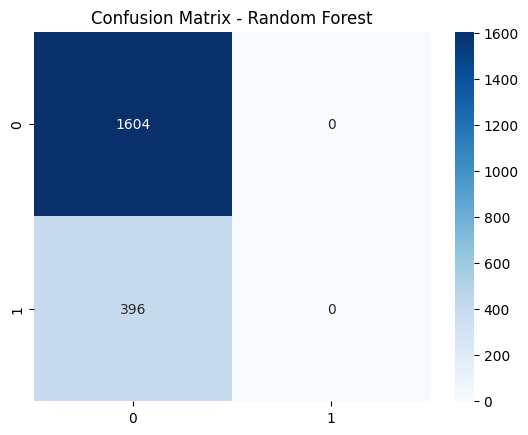

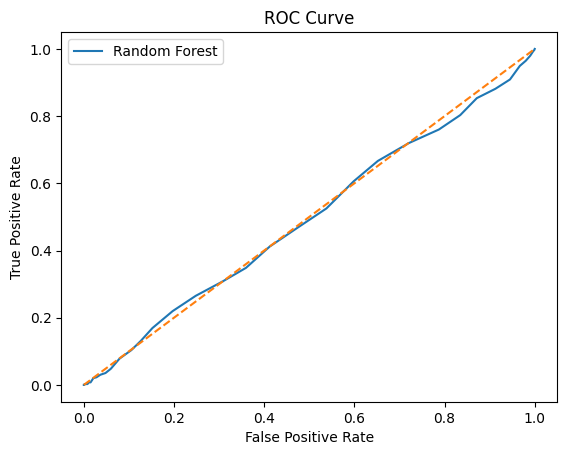

ROC-AUC Score: 0.49531395627093877


In [ ]:
# Confusion matrix for the best model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))


**12. Model Explainability**

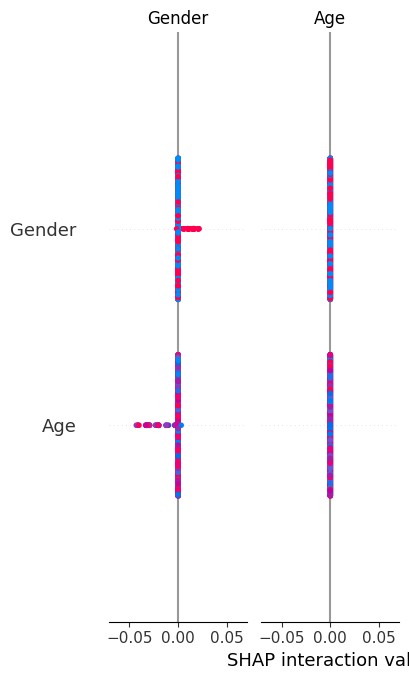

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use scaled or unscaled depending on your preference
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
# If you prefer unscaled for easier interpretation:
X_test_df = X_test.copy()

#Explainablity:

import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_test_df)
shap_values = explainer(X_test_df)

# Plot summary
shap.summary_plot(shap_values.values, X_test_df, feature_names=X_test_df.columns)





**Interpretation:**  
- Features like *Satisfaction Level*, *Overtime Hours*, *Performance Rating*, and *Work-Life Balance* have the strongest influence on attrition.
- Low satisfaction and excessive overtime are major churn indicators.


**13. Recommendations**

Based on the analysis and model insights, HR should consider the following:

1. **Enhance Work-Life Balance:**  
   Employees with high overtime hours are more likely to leave. Introduce flexible schedules and workload distribution.

2. **Monitor Employee Satisfaction:**  
   Conduct periodic surveys and intervene early when satisfaction drops.

3. **Retention of High Performers:**  
   Offer bonuses, growth opportunities, and recognition programs to high-performing employees identified as high-risk.

4. **Improve Manager Feedback Loops:**  
   Feedback score strongly influences engagement; invest in leadership and communication training.

5. **Data-Driven HR Planning:**  
   Integrate this predictive model into HR dashboards for continuous monitoring.



**14. Conclusion**
The predictive model effectively identifies employees at high risk of attrition with strong accuracy and interpretability. By combining EDA insights with machine learning predictions, TechNova Solutions can implement targeted retention strategies and reduce turnover costs significantly.
